In [3]:
from unicodedata import name
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

url = 'https://www.fantasypros.com/nfl/stats/wr.php'
html = urlopen(url)
statsPage = BeautifulSoup(html)

In [4]:
columnHeaders = statsPage.findAll('tr') [1]
columnHeaders = [i.getText() for i in columnHeaders.findAll('th')]


rows = statsPage.findAll('tr')[2:]

In [5]:
wrStats = []
for i in range(len(rows)):
       wrStats.append([col.getText() for col in rows[i].findAll('td')])

recievingData = pd.DataFrame(wrStats, columns=columnHeaders[0:])

In [6]:
url = 'https://overthecap.com/position/wide-receiver/'
html = urlopen(url)
statsPage = BeautifulSoup(html)

columnHeaders = statsPage.findAll('tr') [0]
columnHeaders = [i.getText() for i in columnHeaders.findAll('th')]

rows = statsPage.findAll('tr')[1:]

wrSalary = []
for i in range(len(rows)):
       wrSalary.append([col.getText() for col in rows[i].findAll('td')])

salaryData = pd.DataFrame(wrSalary, columns=columnHeaders[0:])


     Unnamed: 0  Rank                        Player  REC  TGT   YDS   Y/R  LG  \
0           0.0     1            Cooper Kupp (LAR)   145  191  1947  13.4  59   
1           1.0     2            Deebo Samuel (SF)    77  121  1405  18.2  83   
2           2.0     3          Ja'Marr Chase (CIN)    81  128  1455  18.0  82   
3           3.0     4       Justin Jefferson (MIN)   108  167  1616  15.0  56   
4           4.0     5           Davante Adams (LV)   123  169  1553  12.6  59   
..          ...   ...                           ...  ...  ...   ...   ...  ..   
156       156.0   157             Jeff Smith (NYJ)     8   17   113  14.1  35   
157       157.0   158  Equanimeous St. Brown (CHI)     9   17    98  10.9  26   
158       158.0   159     Phillip Dorsett II (HOU)     7   14   110  15.7  36   
159       159.0   160        Dez Fitzpatrick (TEN)     5    8    49   9.8  18   
160       160.0   161         Collin Johnson (NYG)    11   21   105   9.5  16   

     20+  TD  ATT  YDS.1  T

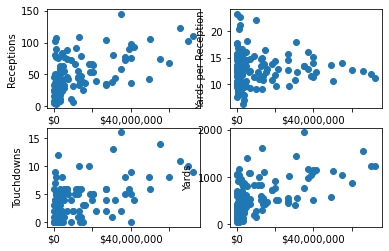

In [7]:
salaryData[salaryData.columns[5:6]] = salaryData[salaryData.columns[5:6]].replace('[\$,]', '', regex=True).astype(float)

fulldf = pd.read_csv('C:/Users/tyler/Downloads/receiving2.csv')
fulldf = fulldf.dropna()
fulldf = fulldf.astype({'YDS': int})
print(fulldf)

x = fulldf['Money']
y1 = fulldf['REC']
y2 = fulldf['YDS']
y3 = fulldf['TD']
y4 = fulldf['Y/R']


#fig, ax = plt.subplots()

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set_ylabel('Receptions')
ax2= fig.add_subplot(222)
ax2.set_ylabel('Yards per Reception')
ax3= fig.add_subplot(223)
ax3.set_ylabel('Touchdowns')
ax4= fig.add_subplot(224)
ax4.set_ylabel('Yards')
ax1.scatter(x, y1)
ax2.scatter(x, y4)
ax3.scatter(x, y3)
ax4.scatter(x, y2)
ind = np.arange(8)

#ax.set_xlabel('Contract Worth($')
#ax.set_ylabel('Receptions')

#plt.scatter(x,y1)
myLocator = mticker.MultipleLocator(4)

ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax2.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax3.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax4.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
for label in ax2.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

for label in ax1.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

for label in ax3.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

for label in ax4.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)



In [8]:
fulldf.corr()

,Unnamed: 0,Rank,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,Money
Unnamed: 0,1.000000,1.000000,-0.892776,-0.900971,-0.920196,-0.150148,-0.569772,NaN,-0.814700,-0.261017,-0.272085,-0.160305,-0.237483,-0.704888,-0.924072,-0.768033,-0.554921
Rank,1.000000,1.000000,-0.892776,-0.900971,-0.920196,-0.150148,-0.569772,NaN,-0.814700,-0.261017,-0.272085,-0.160305,-0.237483,-0.704888,-0.924072,-0.768033,-0.554921
REC,-0.892776,-0.892776,1.000000,0.982169,0.959279,-0.059064,0.421804,NaN,0.752828,0.235822,0.224498,0.130793,0.279825,0.649487,0.923269,0.746718,0.604776
TGT,-0.900971,-0.900971,0.982169,1.000000,0.957477,-0.021644,0.429683,NaN,0.740137,0.230377,0.221015,0.126538,0.250892,0.669556,0.917123,0.731925,0.606549
YDS,-0.920196,-0.920196,0.959279,0.957477,1.000000,0.151091,0.524963,NaN,0.803746,0.285915,0.266063,0.185500,0.257186,0.642996,0.974990,0.804388,0.598164
Y/R,-0.150148,-0.150148,-0.059064,-0.021644,0.151091,1.000000,0.498635,NaN,0.164773,0.032398,0.004009,0.046286,-0.025473,-0.023805,0.158676,0.214373,0.031778
LG,-0.569772,-0.569772,0.421804,0.429683,0.524963,0.498635,1.000000,NaN,0.472976,0.283694,0.245528,0.129061,0.178051,0.421350,0.536159,0.426513,0.234647
20+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TD,-0.814700,-0.814700,0.752828,0.740137,0.803746,0.164773,0.472976,NaN,1.000000,0.115388,0.128294,0.053994,0.103262,0.479274,0.888469,0.803611,0.569439
ATT,-0.261017,-0.261017,0.235822,0.230377,0.285915,0.032398,0.283694,NaN,0.115388,1.000000,0.947072,0.817015,0.344103,0.246275,0.357670,0.284426,-0.007824


C:\Users\tyler\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


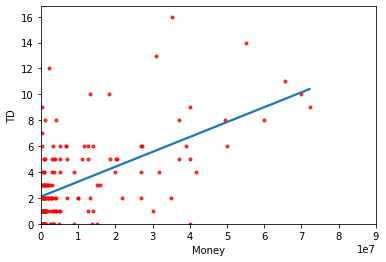

In [9]:
sns.regplot('Money', 'TD', data = fulldf, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,90000000)
plt.ylim(ymin=0);

In [10]:
import sklearn.linear_model as skl_lm

# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(fulldf.TD, with_mean=True, with_std=False).reshape(-1,1)
y = fulldf.Money

regr.fit(X,y)

print(regr.intercept_)
print(regr.coef_)

9975292.0
[2818657.89962487]


In [11]:
import statsmodels.formula.api as smf
est = smf.ols('Money ~ TD + REC + YDS', fulldf).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     31.91
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           6.38e-16
Time:                        17:36:24   Log-Likelihood:                -2658.1
No. Observations:                 150   AIC:                             5324.
Df Residuals:                     146   BIC:                             5336.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.954e+06    1.7e+06     -1.737      0.084   -6.31e+06    4.07e+05
TD          1.354e+06   5.38e+05      2.516      0.013    2.91e+05    2.42e+06
REC          2.35e+05   1.19e+05      1.967      0.051   -1121.318    4.71e+05
YDS        -2179.7774   1.02e+04     -0.213      0.832   -2.24e+04    1.81e+04
==============================================================================
Omnibus:                       27.147   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.963
Skew:                           0.902   Prob(JB):                     2.84e-10
Kurtosis:                       4.944   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
est = smf.ols('Money ~ TD + YDS + REC', fulldf).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.954e+06,1.7e+06,-1.737,0.084,-6.31e+06,4.07e+05
TD,1.354e+06,5.38e+05,2.516,0.013,2.91e+05,2.42e+06
YDS,-2179.7774,1.02e+04,-0.213,0.832,-2.24e+04,1.81e+04
REC,2.35e+05,1.19e+05,1.967,0.051,-1121.318,4.71e+05


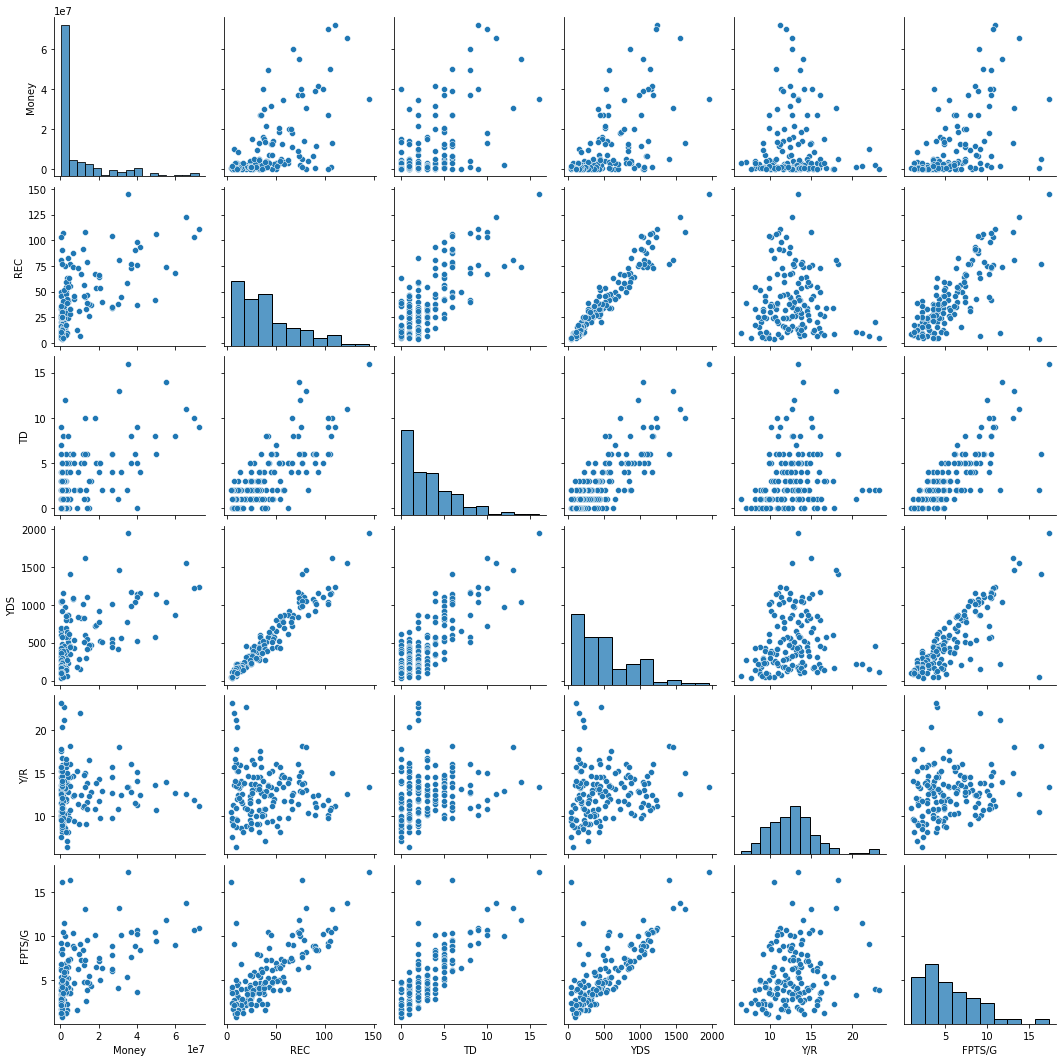

In [13]:
sns.pairplot(fulldf[['Money','REC','TD','YDS','Y/R','FPTS/G']])
plt.show()

In [16]:
fulldf.describe()

,Unnamed: 0,Rank,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,Money
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02
mean,80.246667,81.246667,41.040000,64.493333,515.300000,12.683333,45.866667,0.0,3.253333,2.520000,16.113333,0.133333,0.306667,12.740000,73.547333,5.552000,9.975292e+06
std,47.571061,47.571061,29.746554,43.422499,384.113444,2.943253,16.430724,0.0,3.134966,5.644645,37.473666,0.711051,0.566950,4.037459,56.684278,3.378291,1.551771e+07
min,0.000000,1.000000,4.000000,5.000000,38.000000,6.400000,13.000000,0.0,0.000000,0.000000,-13.000000,0.000000,0.000000,1.000000,10.500000,0.900000,1.278400e+05
25%,37.250000,38.250000,16.250000,26.250000,211.250000,10.725000,35.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,31.375000,2.900000,9.289090e+05
50%,81.500000,82.500000,34.000000,57.000000,425.000000,12.550000,44.000000,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,14.000000,56.150000,4.700000,2.775248e+06
75%,121.750000,122.750000,57.500000,93.500000,774.500000,14.100000,57.000000,0.0,5.000000,3.000000,19.500000,0.000000,1.000000,16.000000,105.650000,7.475000,1.271235e+07
max,160.000000,161.000000,145.000000,191.000000,1947.000000,23.200000,91.000000,0.0,16.000000,59.000000,365.000000,8.000000,3.000000,17.000000,294.500000,17.300000,7.220000e+07


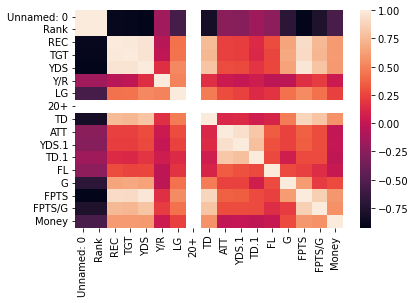

In [23]:
sns.heatmap(fulldf.corr(), annot = False)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Age'

In [26]:
estTD = smf.ols('Money ~ TD', fulldf).fit()
estTD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     71.02
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.87e-14
Time:                        22:01:57   Log-Likelihood:                -2666.6
No. Observations:                 150   AIC:                             5337.
Df Residuals:                     148   BIC:                             5343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.053e+05   1.51e+06      0.534      0.594   -2.18e+06    3.79e+06
TD          2.819e+06   3.34e+05      8.427      0.000    2.16e+06    3.48e+06
==============================================================================
Omnibus:                       39.409   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.768
Skew:                           1.246   Prob(JB):                     7.08e-16
Kurtosis:                       5.225   Cond. No.                         6.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
estREC = smf.ols('Money ~ REC', fulldf).fit()
estREC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     85.35
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.49e-16
Time:                        22:05:52   Log-Likelihood:                -2661.8
No. Observations:                 150   AIC:                             5328.
Df Residuals:                     148   BIC:                             5334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.972e+06   1.73e+06     -1.719      0.088   -6.39e+06    4.44e+05
REC         3.155e+05   3.41e+04      9.238      0.000    2.48e+05    3.83e+05
==============================================================================
Omnibus:                       34.330   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.788
Skew:                           1.063   Prob(JB):                     2.32e-14
Kurtosis:                       5.350   Cond. No.                         86.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""